In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')

C:\Users\oscar\AppData\Local\Temp\ipykernel_25588\3294993672.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')


In [7]:
data_credits=pd.read_csv('..\datasets\credits.csv',encoding='UTF-8',sep=',')

In [ ]:
data_movies.head(2)
#data_movies.columns

In [ ]:
data_credits.head(2)
#data_credits.columns

In [ ]:
df = pd.merge(data_movies, data_credits, on='id', how='inner')


In [ ]:
#data_movies.info()
data_credits.info()

In [ ]:
#data_movies['id'].unique()
print("id:",data_movies['id'].describe())

In [ ]:
null_counts =data_movies['id'].isna().sum()
null_counts

In [ ]:
data_movies
data_movies.hist(bins=30, figsize=(20, 15), layout=(4, 5))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

In [ ]:
categorical_columns = data_movies.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data_movies[col], order=data_movies[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [3]:
#filtro = data_movies['id'].str.startswith('1997')
#aplico un filtro para encontrar las observaciones con fecha
filtro = data_movies['id'].str.contains('-')
df_filtrado = data_movies[filtro]



NameError: name 'data_movies' is not defined

In [ ]:
df_filtrado = df_filtrado[df_filtrado['id'] == '1997-08-20']

In [ ]:
df_filtrado.head(5)

In [ ]:
#Borrar registros
#data_movies = data_movies[data_movies['id'] != '1997-08-20']
#data_movies = data_movies[data_movies['id'] != '2012-09-29']
data_movies = data_movies[data_movies['id'] != '2014-01-01']

In [ ]:
data_movies['id'] = data_movies['id'].astype('int64')

In [147]:
import pandas as pd

# Lee el archivo CSV
#df = pd.read_csv('data.csv')
data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')
data_credits=pd.read_csv('..\datasets\credits.csv',encoding='UTF-8',sep=',')



C:\Users\oscar\AppData\Local\Temp\ipykernel_30544\3342671557.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')


### Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [148]:
#data_movies['revenue'].isna().sum()
data_movies['revenue']=data_movies['revenue'].fillna(0)

In [149]:
data_movies['revenue'].isna().sum()

0

In [150]:
 
data_movies['budget'].isna().sum()
data_movies['budget']=data_movies['budget'].fillna(0)
print(data_movies['budget'].isna().sum())

0


In [ ]:
data_movies.head(1)

### Los valores nulos del campo release date deben eliminarse.

In [151]:
data_movies['release_date'].unique()

array(['1995-10-30', '1995-12-15', '1995-12-22', ..., '1904-03-05',
       '1991-05-13', '1917-10-21'], dtype=object)

In [152]:
data_movies['release_date'].isna().sum()

87

In [153]:
#Borrado de nulos
data_movies = data_movies.dropna(subset=['release_date'])


In [154]:
data_movies['release_date']=data_movies['release_date'].str.strip()
df['release_date'] = df['release_date'].astype(str)

In [155]:
import re
regex = re.compile(r'^\d{4}-\d{2}-\d{2}$')
# Crear una columna booleana para marcar filas que cumplen con el formato de fecha
df['release_date'] = df['release_date'].apply(lambda x: bool(regex.match(x)))


In [ ]:
unos=df.loc[df['release_date']=='1','release_date']
print(unos)

In [165]:
data_movies['release_date'].info()



<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 709.0 KB


In [156]:
#descomponer fecha
#data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='mixed') 
data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='mixed',errors='coerce') 
#%Y-%m-%d

#data['mes'] = data['release_date'].data.month
#df['anio'] = df['release_date'].dt.year

In [157]:
data_movies['release_date'].isna().sum()

3

In [158]:
data_movies = data_movies.dropna(subset=['release_date'])

### De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [159]:
data_movies['mes'] = data_movies['release_date'].dt.month
data_movies['año'] = data_movies['release_date'].dt.year

In [160]:
data_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,mes,año
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12,1995


### Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [161]:
data_movies['revenue'].info()

<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 709.0 KB


In [162]:
data_movies['budget'].info()
data_movies['budget']=data_movies['budget'].astype(float)
data_movies['budget'].info()

<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype 
--------------  ----- 
45376 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB
<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 709.0 KB


In [4]:
data_movies['return'] = (data_movies['revenue']/data_movies['budget'])

NameError: name 'data_movies' is not defined

In [164]:
data_movies['return'].unique()
data_movies['return'].isna().sum()

34464

In [175]:
# Convierte el DataFrame a una lista de diccionarios
data = data_movies.to_dict(orient='records')
data_r=data_credits.to_dict(orient='records')

In [176]:
from pymongo import MongoClient

# Conéctate a MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Selecciona la base de datos y la colección
db = client['mydbmongo']
collection = db['movies']

# Inserta los datos
collection.insert_many(data)
#collection.insert_many(data_movies)




InsertManyResult([ObjectId('66836b7125bec0e67cc61b2a'), ObjectId('66836b7125bec0e67cc61b2b'), ObjectId('66836b7125bec0e67cc61b2c'), ObjectId('66836b7125bec0e67cc61b2d'), ObjectId('66836b7125bec0e67cc61b2e'), ObjectId('66836b7125bec0e67cc61b2f'), ObjectId('66836b7125bec0e67cc61b30'), ObjectId('66836b7125bec0e67cc61b31'), ObjectId('66836b7125bec0e67cc61b32'), ObjectId('66836b7125bec0e67cc61b33'), ObjectId('66836b7125bec0e67cc61b34'), ObjectId('66836b7125bec0e67cc61b35'), ObjectId('66836b7125bec0e67cc61b36'), ObjectId('66836b7125bec0e67cc61b37'), ObjectId('66836b7125bec0e67cc61b38'), ObjectId('66836b7125bec0e67cc61b39'), ObjectId('66836b7125bec0e67cc61b3a'), ObjectId('66836b7125bec0e67cc61b3b'), ObjectId('66836b7125bec0e67cc61b3c'), ObjectId('66836b7125bec0e67cc61b3d'), ObjectId('66836b7125bec0e67cc61b3e'), ObjectId('66836b7125bec0e67cc61b3f'), ObjectId('66836b7125bec0e67cc61b40'), ObjectId('66836b7125bec0e67cc61b41'), ObjectId('66836b7125bec0e67cc61b42'), ObjectId('66836b7125bec0e67cc61b

In [173]:
data_movies['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 709.0 KB


In [ ]:
from pymongo import MongoClient

# Conéctate a MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Selecciona la base de datos y la colección
db = client['mydbmongo']
collection = db['credits']

# Inserta los datos
collection.insert_many(data_r)

In [ ]:
import ast
client = MongoClient('mongodb://localhost:27017/')

# Selecciona la base de datos y la colección
db = client['mydbmongo']
collection = db['credits']

# Convertir el campo 'cast' a una lista de diccionarios
df['cast'] = df['cast'].apply(ast.literal_eval)
# Inserta los datos
collection.insert_many(data_r)


In [2]:
df.head(3)
df['cast']

NameError: name 'df' is not defined

In [ ]:
from pymongo import MongoClient

def obtener_personas(filtro=None):
    """
    Consulta datos en la colección 'personas' de la base de datos 'mi_base_de_datos'.

    Args:
        filtro (dict, opcional): Un diccionario que especifica los criterios de búsqueda. 
                                 Si no se proporciona, se devolverán todos los documentos.

    Returns:
        list: Una lista de documentos que coinciden con el filtro.
    """
    # Conéctate a MongoDB
    client = MongoClient('mongodb://localhost:27017/')

    # Selecciona la base de datos y la colección
    db = client['mi_base_de_datos']
    collection = db['personas']

    # Si no se proporciona un filtro, se usa un filtro vacío para obtener todos los documentos
    if filtro is None:
        filtro = {}

    # Realiza la consulta
    resultados = collection.find(filtro)

    # Convierte los resultados a una lista
    lista_resultados = list(resultados)

    # Cierra la conexión
    client.close()

    return lista_resultados

# Ejemplo de uso:
# Consulta todas las personas
todas_las_personas = obtener_personas()
print(todas_las_personas)

# Consulta personas con una edad mayor a 30
personas_mayores_30 = obtener_personas({'edad': {'$gt': 30}})
print(personas_mayores_30)


# EDA


In [10]:
peliculas=pd.read_csv('movies_limpio.csv',encoding='UTF-8',sep=',')

In [11]:
peliculas.columns

Index(['id_orig', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'año', 'return'],
      dtype='object')

(array([7.0000e+00, 6.1000e+01, 1.4800e+02, 7.3300e+02, 1.7170e+03,
        2.1710e+03, 2.6280e+03, 3.6770e+03, 7.2100e+03, 1.2005e+04]),
 array([1878. , 1892.2, 1906.4, 1920.6, 1934.8, 1949. , 1963.2, 1977.4,
        1991.6, 2005.8, 2020. ]),
 <BarContainer object of 10 artists>)

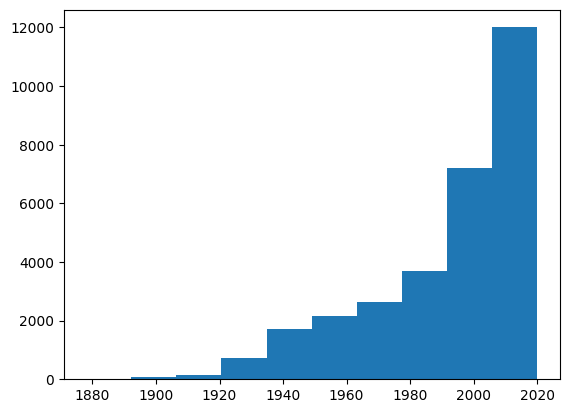

In [18]:
import matplotlib.pyplot as plt
plt.hist(peliculas.año)

In [21]:
peliculas.groupby(['popularity'])['original_title'].count()

popularity
0.000000      30
0.000001      38
0.000002       5
0.000003       4
0.000004       4
              ..
185.330992     1
187.860492     1
213.849907     1
228.032744     1
547.488298     1
Name: original_title, Length: 29508, dtype: int64

In [22]:
peliculas.groupby(['año'])['original_title'].count()

año
1878       1
1883       1
1890       2
1891       1
1892       2
        ... 
2015    1186
2016    1000
2017     373
2018       5
2020       1
Name: original_title, Length: 130, dtype: int64

In [27]:
peliculas.groupby(['original_title'])['vote_count'].count()

original_title
!Women Art Revolution    1
#1 Cheerleader Camp      1
#chicagoGirl             1
$ Dollars                1
$5 a Day                 1
                        ..
전설의 주먹                   1
좋은 친구들                   1
카페 느와르                   1
태풍                       1
포화 속으로                   1
Name: vote_count, Length: 30357, dtype: int64